In [46]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Bank Marketing Data Importing

In [47]:
import pandas as pd
bank_data=pd.read_csv("datasets/bank-full.csv")
print(bank_data.shape)


(45211, 1)


In [48]:
bank_data.columns

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')

In [49]:
import pandas as pd
bank_data=pd.read_csv("datasets/bank-full.csv",sep=';')
print(bank_data.shape)

(45211, 17)


In [50]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [51]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Continuous variable distributions

## Box Plots (Box plot is used to find the outliers in the data )

{'whiskers': [<matplotlib.lines.Line2D at 0x14349502e90>,
 'caps': [<matplotlib.lines.Line2D at 0x14348a54ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14349558210>],
 'medians': [<matplotlib.lines.Line2D at 0x14349499650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1434949a010>],
 'means': []}

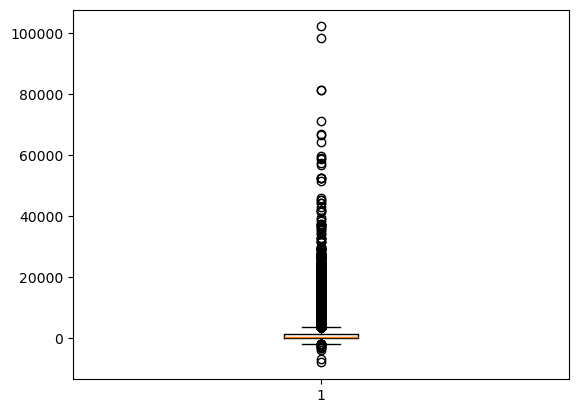

In [52]:
import matplotlib.pyplot as plt
plt.boxplot(bank_data["balance"]) # box plot its compressed means there are outliers in the data

{'whiskers': [<matplotlib.lines.Line2D at 0x143494f7290>,
 'caps': [<matplotlib.lines.Line2D at 0x1434b7d4a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x143494f6810>],
 'medians': [<matplotlib.lines.Line2D at 0x1434b7d60d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1434b7d6c50>],
 'means': []}

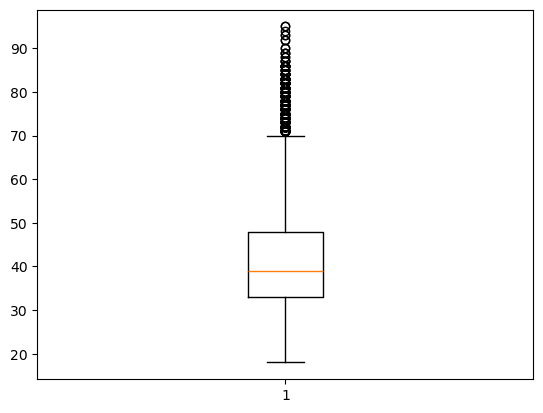

In [53]:
import matplotlib.pyplot as plt
plt.boxplot(bank_data["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1434b785b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1434b7870d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1434b785310>],
 'medians': [<matplotlib.lines.Line2D at 0x1434b778390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1434b778e90>],
 'means': []}

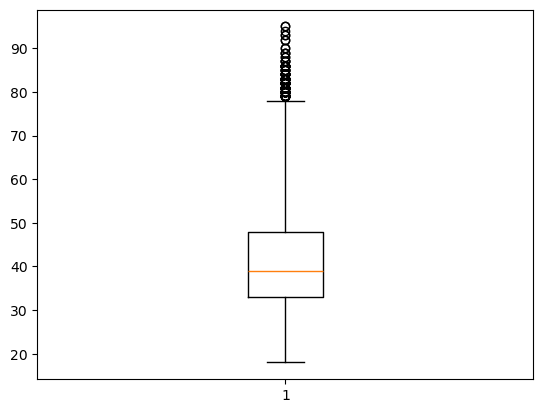

In [54]:
plt.boxplot(bank_data["age"], whis= 2) # whis is the whisker length which is 1.5 by default and can be changed to 2 or 3 
# to get more outliers 1.5 is the default value , 75 % + 1.5 * IQR ,above this value is considered as suggested outliers

## Vilon Plots

<Axes: ylabel='balance'>

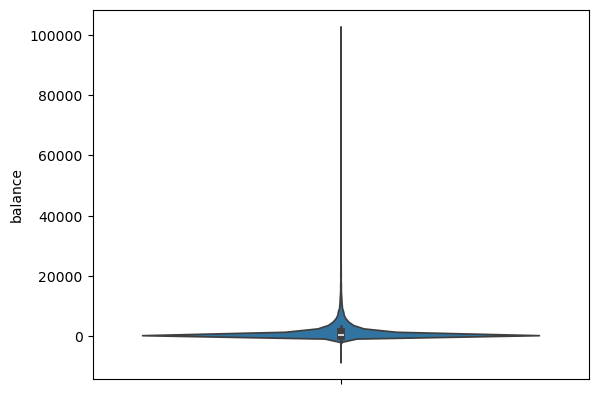

In [55]:
import seaborn as sns
sns.violinplot(y=bank_data["balance"])

<Axes: ylabel='age'>

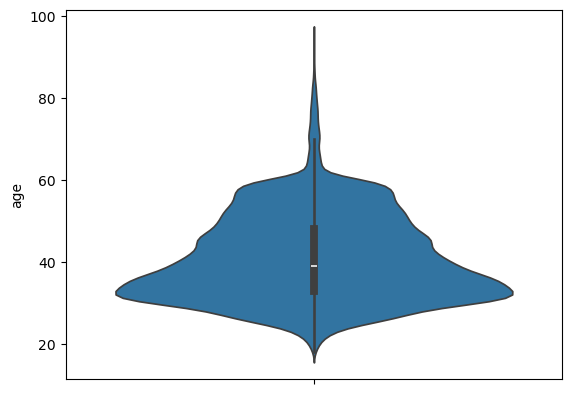

In [56]:
sns.violinplot(y=bank_data["age"])

## Histograms

<Axes: xlabel='age', ylabel='Count'>

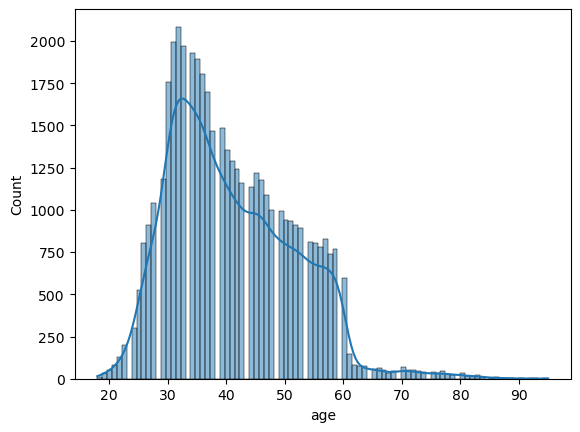

In [57]:
import seaborn as sns
sns.histplot(bank_data["age"],kde=True)

<Axes: xlabel='age', ylabel='Count'>

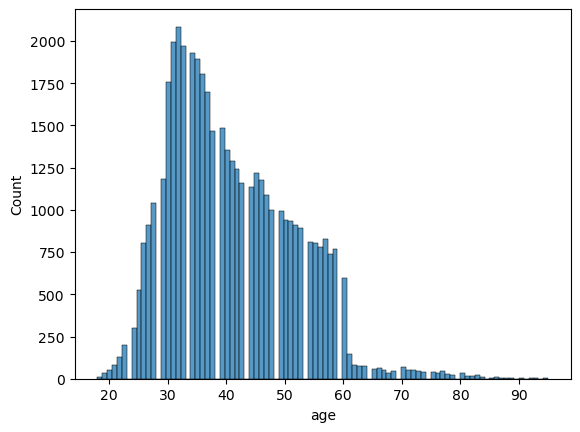

In [58]:
import seaborn as sns
sns.histplot(bank_data["age"],kde=False)

<Axes: xlabel='balance', ylabel='Count'>

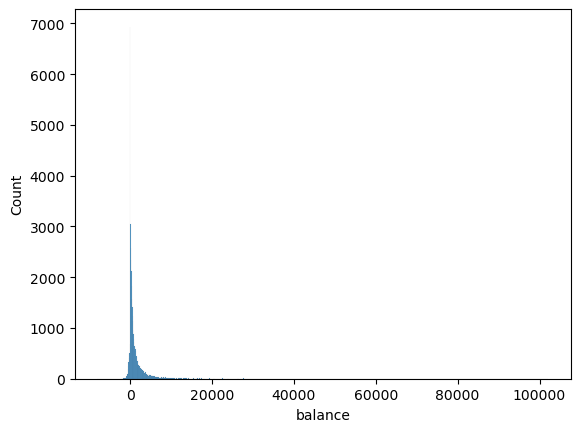

In [59]:
import seaborn as sns
sns.histplot(bank_data["balance"])

In [60]:
numeric_cols=[col for col in bank_data.columns if bank_data[col].dtypes in ["int64","float64"]]
print(numeric_cols)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


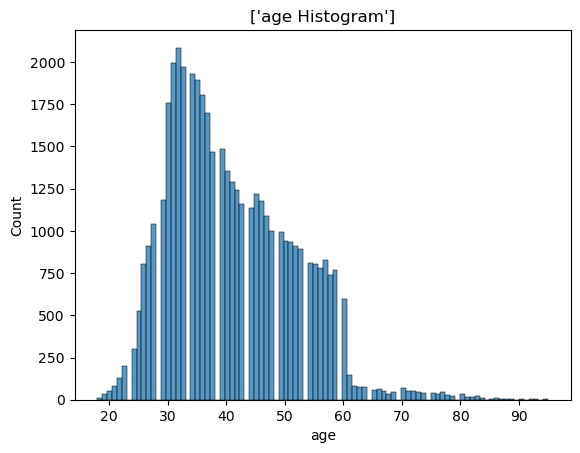

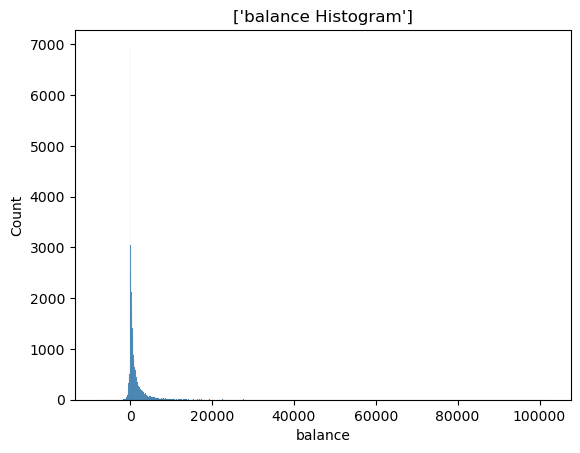

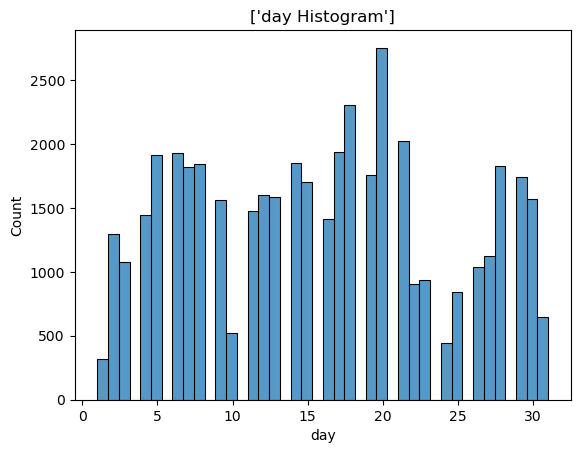

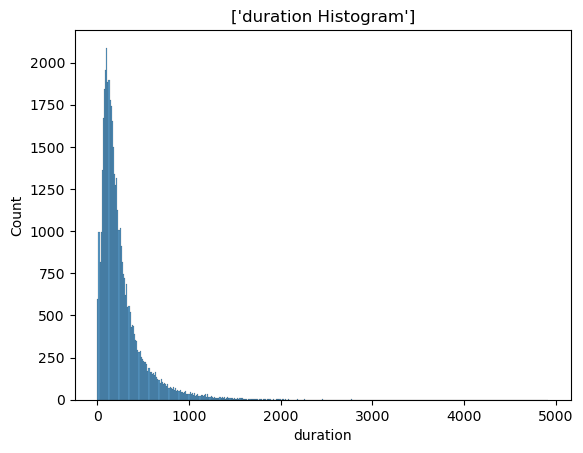

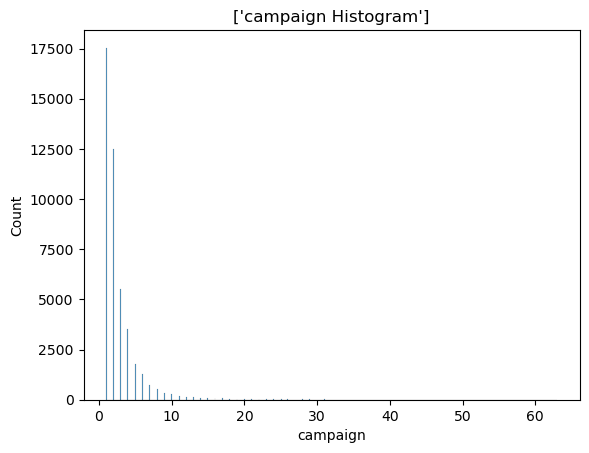

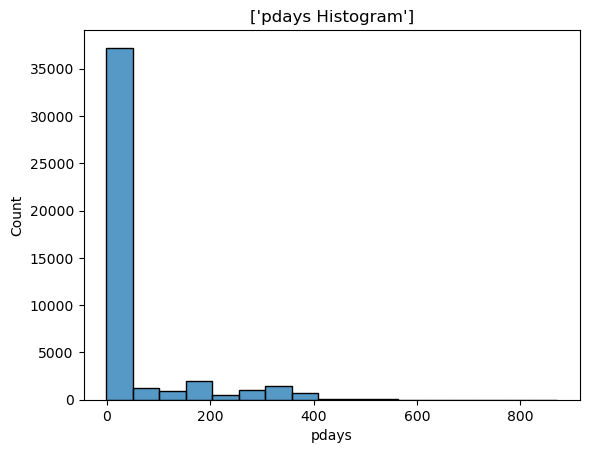

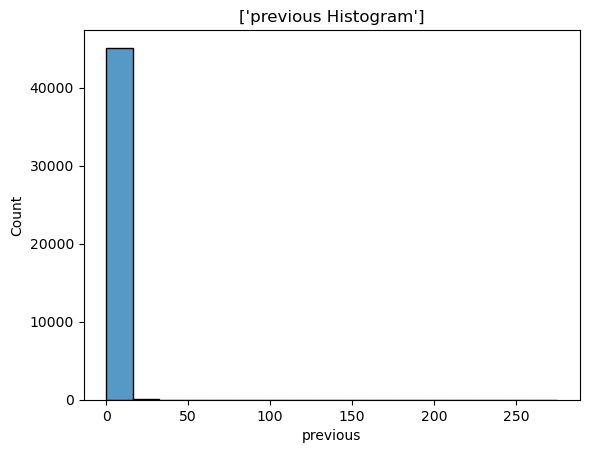

In [61]:
plt.figure()
for col in numeric_cols:
  sns.histplot(bank_data[col])
  plt.title([col + " Histogram"])
  plt.show()


# Rossmann Store Sales Data

Dataset : https://www.kaggle.com/c/rossmann-store-sales/data



* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




In [62]:
sales_data=pd.read_csv("datasets/Rossmann_Store_Sales.csv")
print(sales_data.shape)
print(sales_data.info())
sales_data.sample(5)

(1017209, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Date                       1017209 non-null  object
 3   Sales                      1017209 non-null  int64 
 4   Customers                  1017209 non-null  int64 
 5   Open                       1017209 non-null  int64 
 6   Promo                      1017209 non-null  int64 
 7   StateHoliday               1017209 non-null  object
 8   SchoolHoliday              1017209 non-null  int64 
 9   StoreType                  1017209 non-null  object
 10  Assortment                 1017209 non-null  object
 11  CompetitionDistance        1017209 non-null  int64 
 12  CompetitionOpenSinceMonth  1017209 non-null  int64 
 13  CompetitionOp

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
651671,182,7,24-11-2013,0,0,0,0,0,0,d,c,1390,0,0,1,9,2011,"Mar,Jun,Sept,Dec"
418359,1020,7,22-06-2014,0,0,0,0,0,0,a,a,40,8,2015,0,0,0,0
63864,310,4,04-06-2015,9868,772,1,1,0,0,a,c,2290,0,0,1,10,2014,"Mar,Jun,Sept,Dec"
356938,1048,1,25-08-2014,6436,619,1,0,0,0,d,c,1860,9,2012,1,40,2012,"Jan,Apr,Jul,Oct"
572853,529,1,03-02-2014,11074,962,1,1,0,0,d,c,12920,9,2012,0,0,0,0


These all box plot,violin, histogram will tell us whether outlier is der or not but it will not tell us what percentage of outlier is der, then we will go for percintile calculation

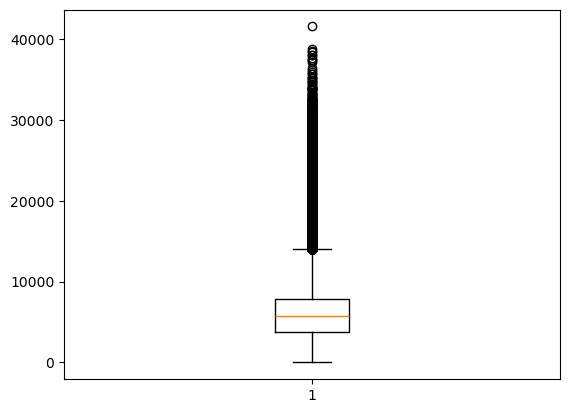

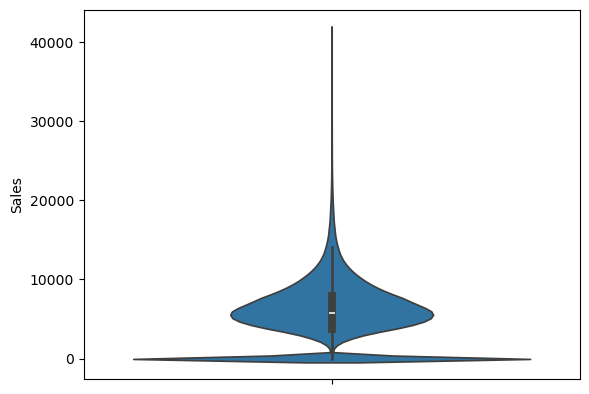

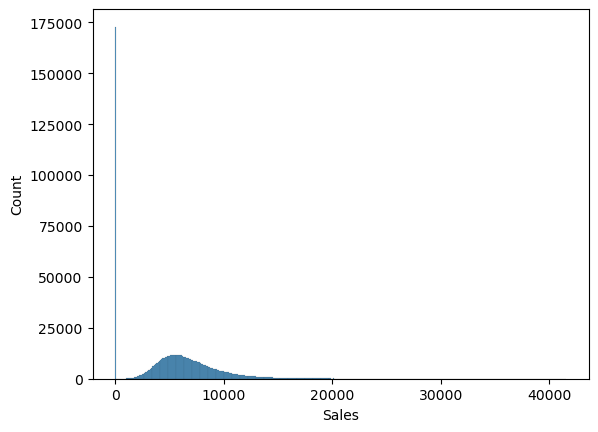

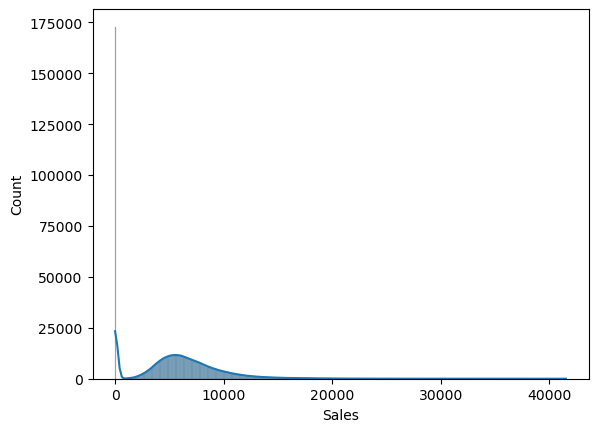

In [63]:
#Sales
plt.boxplot(sales_data["Sales"])
plt.show()
sns.violinplot(y=sales_data["Sales"])
plt.show()
sns.histplot(sales_data["Sales"])
plt.show()
sns.histplot(sales_data["Sales"],kde=True)
plt.show()

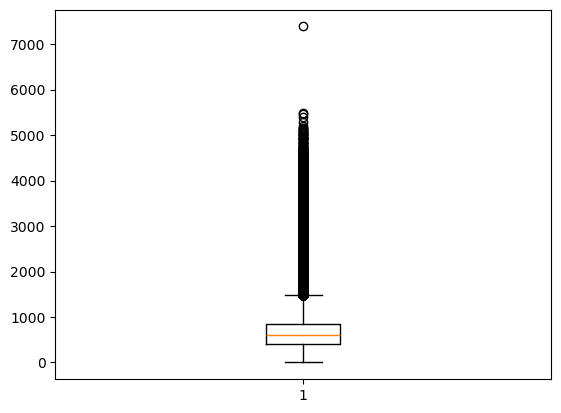

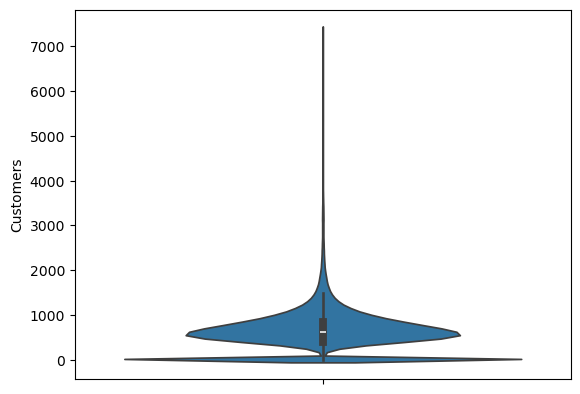

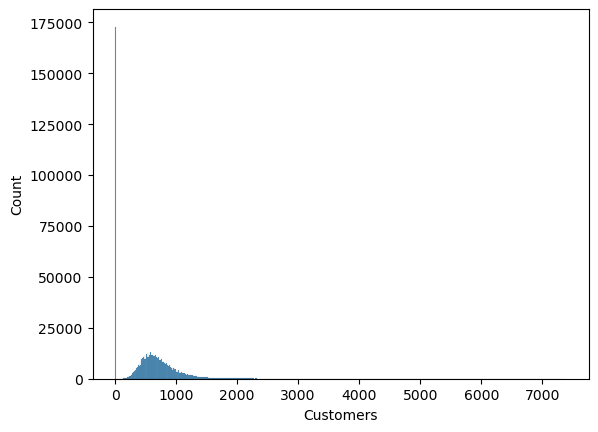

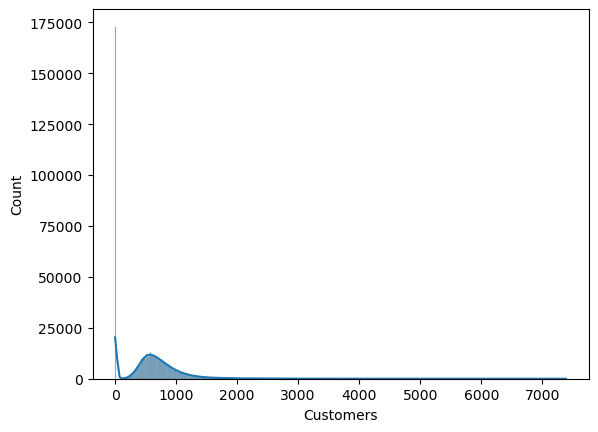

In [64]:
# Customers
plt.boxplot(sales_data["Customers"])
plt.show()
sns.violinplot(y=sales_data["Customers"])
plt.show()
sns.histplot(sales_data["Customers"])
plt.show()
sns.histplot(sales_data["Customers"],kde=True)
plt.show()

# Categorical Variables Summary

## Bar Charts

<Axes: xlabel='job', ylabel='count'>

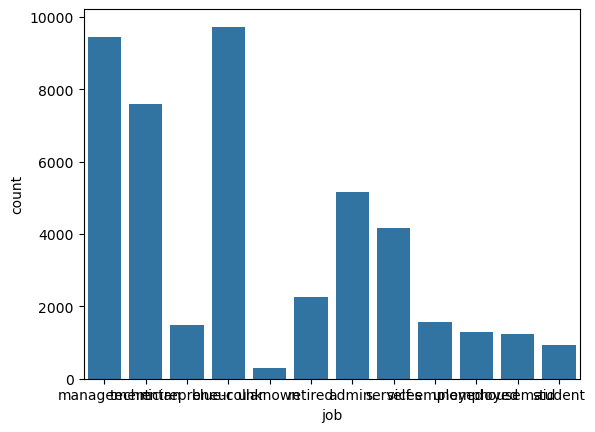

In [65]:
plt.figure()
sns.countplot(x="job",  data=bank_data)

<Axes: xlabel='count', ylabel='job'>

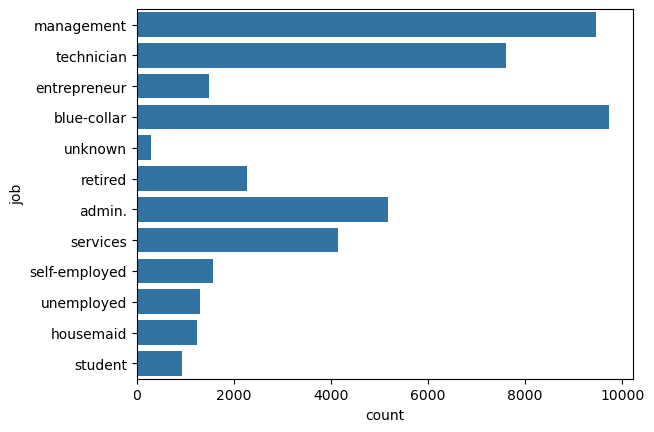

In [66]:
plt.figure()
sns.countplot(y="job",  data=bank_data)

In [67]:
categorical_cols=[col for col in bank_data.columns if bank_data[col].dtypes in ["object"]]
print(categorical_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


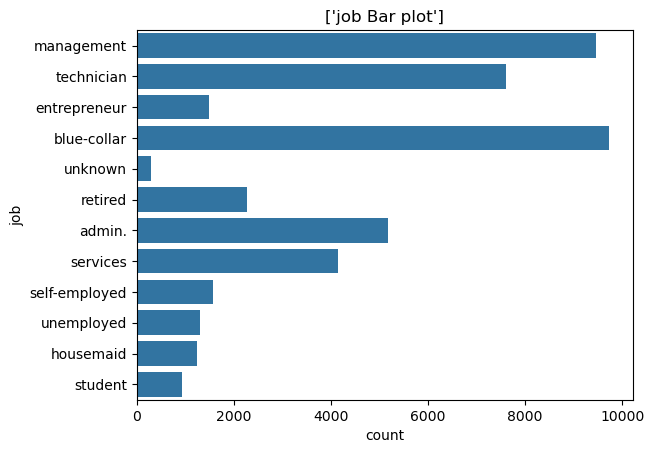

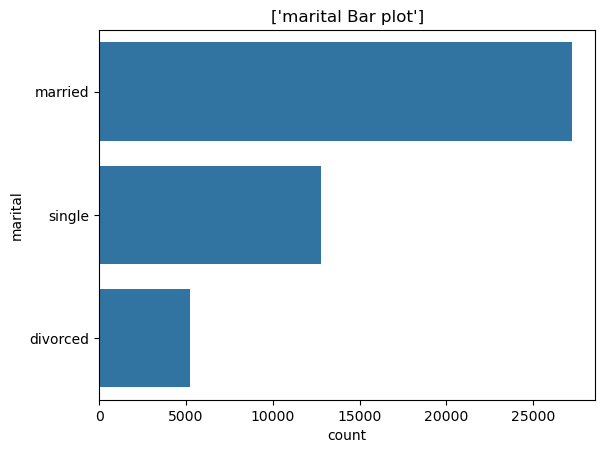

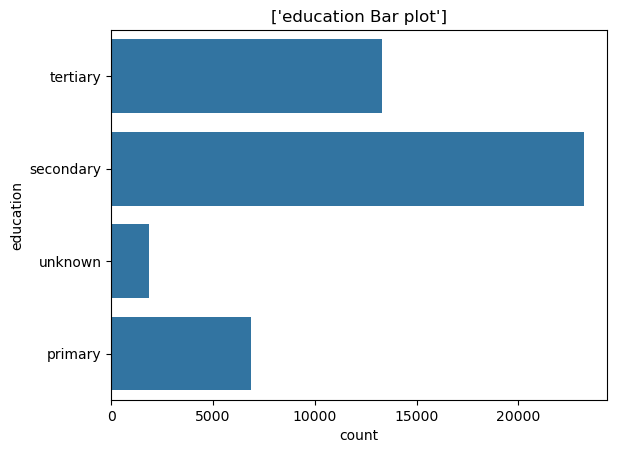

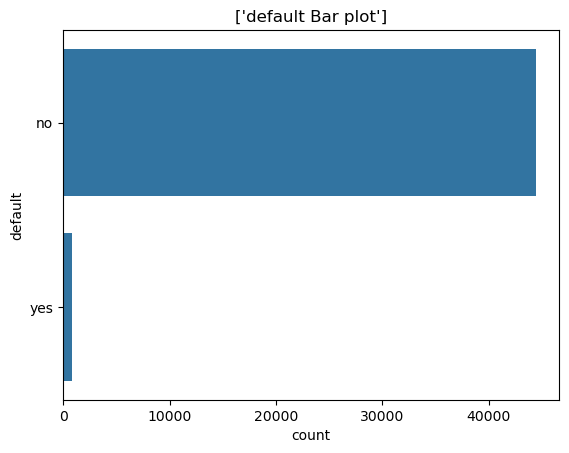

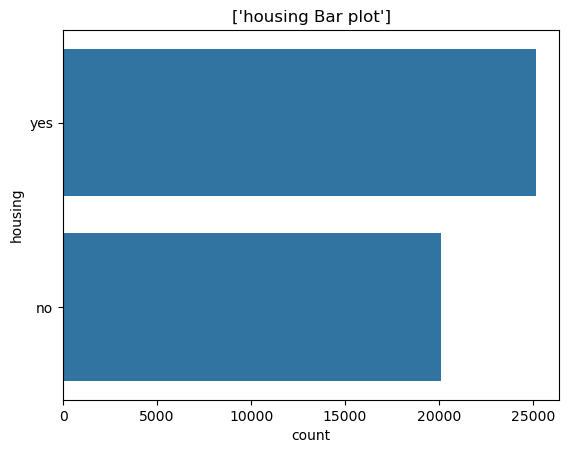

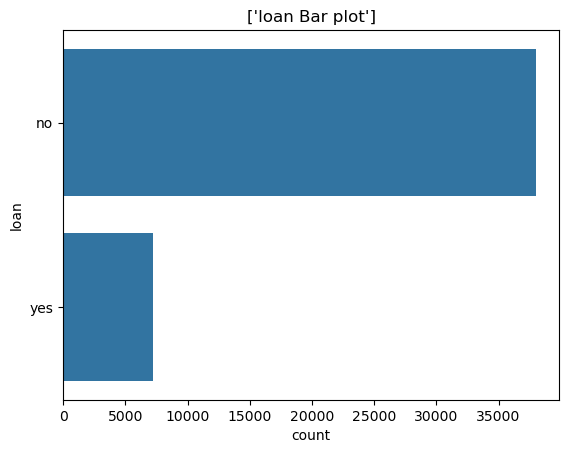

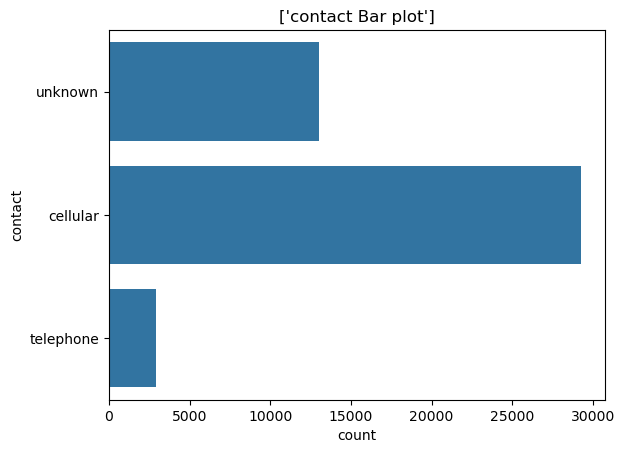

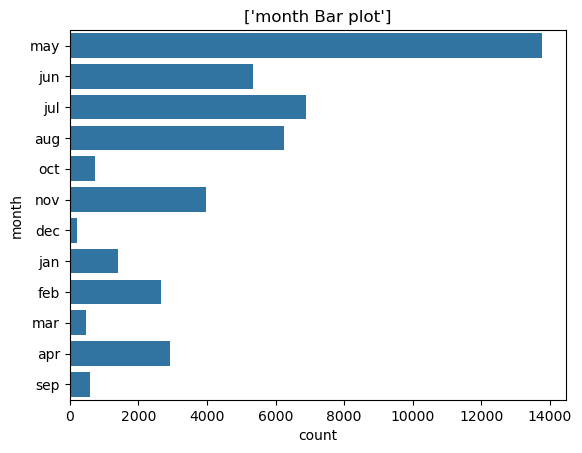

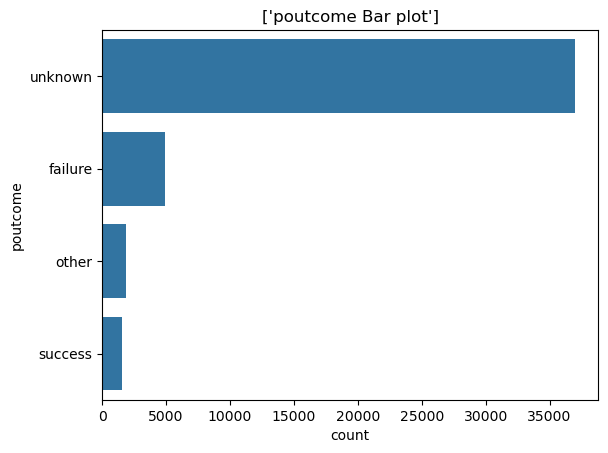

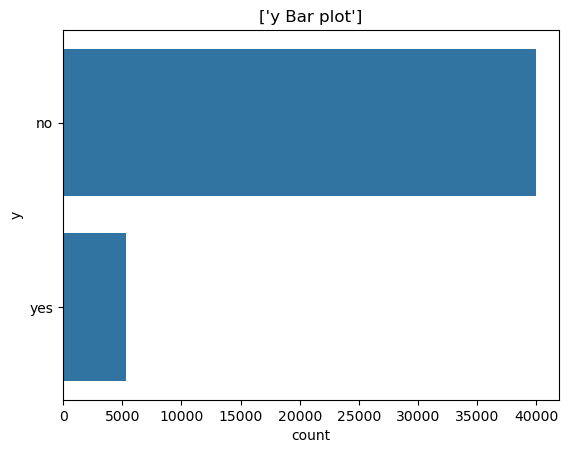

In [68]:
plt.figure()
for col in categorical_cols:
  sns.countplot(y=col,  data=bank_data)
  plt.title([col + " Bar plot"])
  plt.show()


# Rossmann Store Sales

In [69]:
sales_data=pd.read_csv("datasets/Rossmann_Store_Sales.csv")

<Axes: xlabel='StoreType', ylabel='count'>

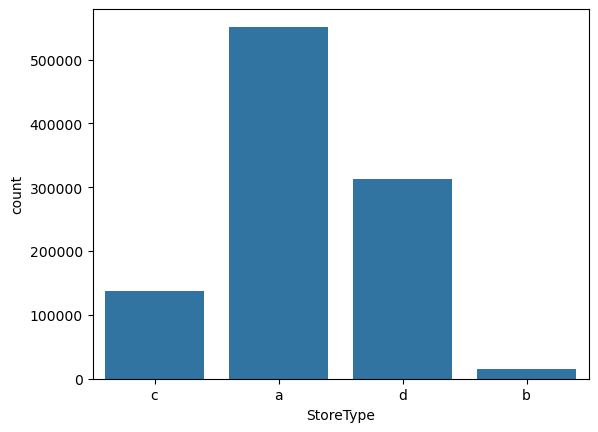

In [70]:
import seaborn as sns
sns.countplot(x="StoreType", data=sales_data)

<Axes: xlabel='Assortment', ylabel='count'>

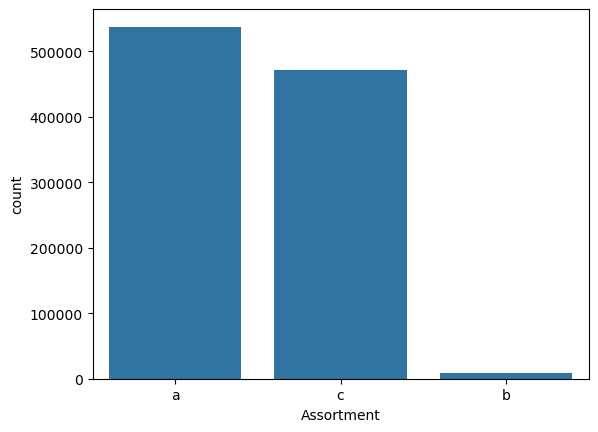

In [71]:
sns.countplot(x="Assortment",  data=sales_data)

In [72]:
sales_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

# Continuous(X) vs Continuous(Y)

### Correlation when we are checking between two continuos variables
### when we are looking for multivariate analysis between continous values we will go for P value
### the relation is vizualised using scatter plot , quntified using correlation coffiicent

In [73]:
import numpy as np
np.corrcoef(bank_data["age"],bank_data["balance"])

array([[1.        , 0.09778274],
       [0.09778274, 1.        ]])

## Scatter Plots

In [74]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='age', ylabel='balance'>

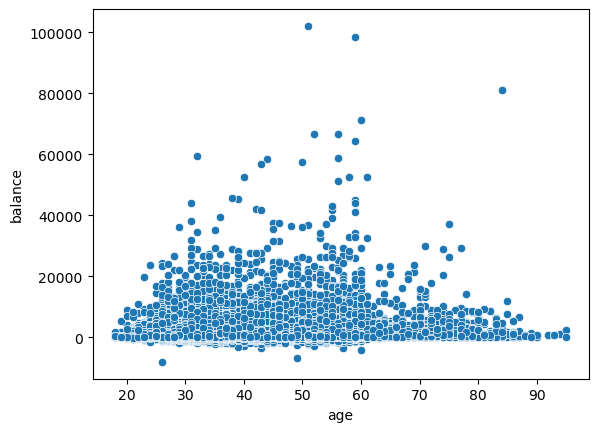

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="age", y="balance", data=bank_data)

<Axes: xlabel='age', ylabel='balance'>

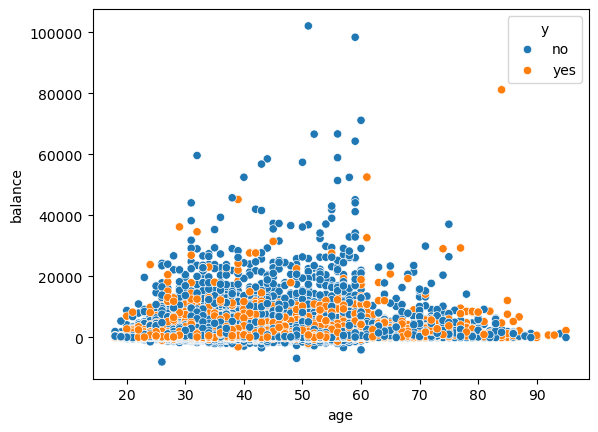

In [76]:
sns.scatterplot(x="age", y="balance", hue="y", data=bank_data)

<Axes: xlabel='age', ylabel='balance'>

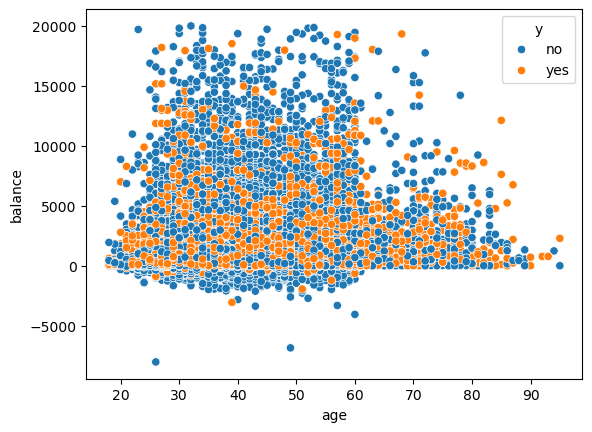

In [77]:
sns.scatterplot(x="age", y="balance", hue="y", data=bank_data[bank_data["balance"]<20000])

# Rossmann Store Sales

<Axes: xlabel='Customers', ylabel='Sales'>

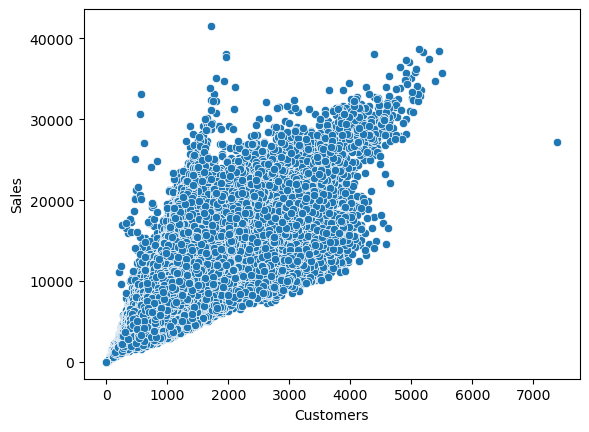

In [78]:
#Sales vs Customers
sns.scatterplot(y="Sales", x="Customers", data=sales_data)

In [79]:
np.corrcoef(sales_data["Sales"],sales_data["Customers"])

array([[1.        , 0.89471077],
       [0.89471077, 1.        ]])

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

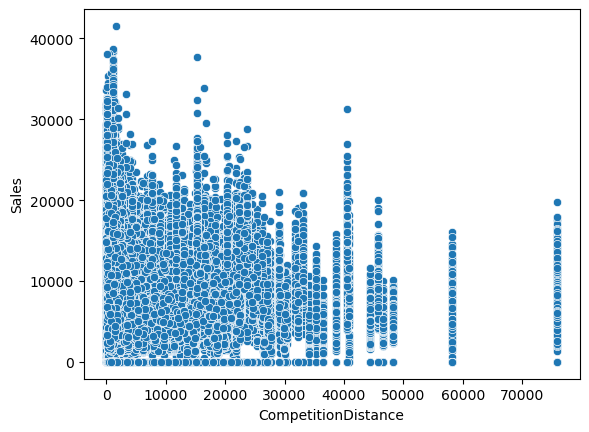

In [80]:
#Sales vs CompetitionDistance
sns.scatterplot(y="Sales", x="CompetitionDistance", data=sales_data)

In [81]:
np.corrcoef(sales_data["Sales"],sales_data["CompetitionDistance"])

array([[ 1.        , -0.01860928],
       [-0.01860928,  1.        ]])

# Continuous(X) vs Categorical (Y)

## Visualization options

### Bank Marketing Data

In [82]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

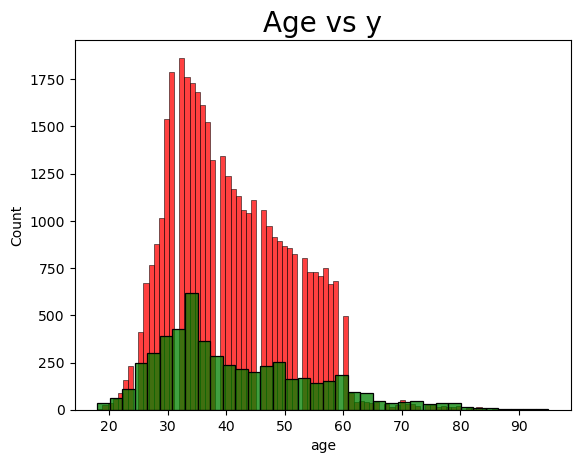

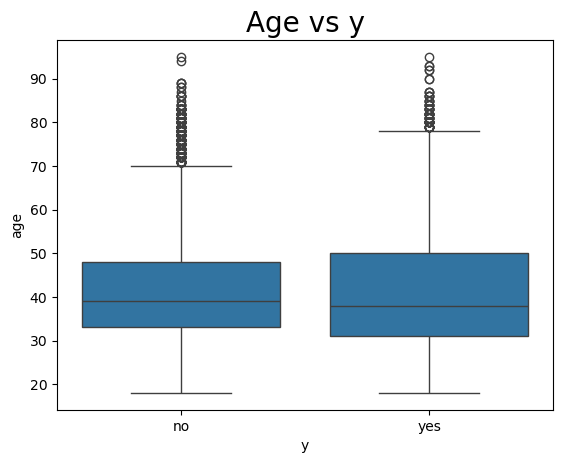

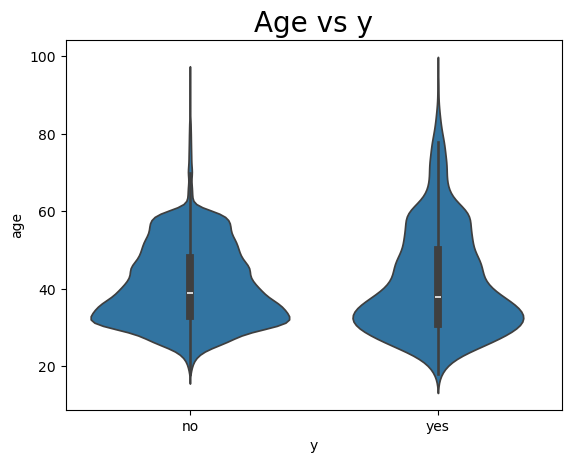

In [83]:
#Histogram Overlay
sns.histplot(bank_data[bank_data["y"]=="no"]["age"], color="red")
sns.histplot(bank_data[bank_data["y"]=="yes"]["age"], color="green")
plt.title('Age vs y', fontsize=20)
plt.show()

#Box Plots for Continuous and Categories comparison
sns.boxplot( x=bank_data["y"], y=bank_data["age"])
plt.title('Age vs y', fontsize=20)
plt.show()

#Violin plots for Continuous and Categories comparison
sns.violinplot(x=bank_data["y"], y=bank_data["age"])
plt.title('Age vs y', fontsize=20)
plt.show()

### Credit Risk Data

In [84]:
credit_risk=pd.read_csv("datasets/Cleaned_cs_training.csv")
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sr_No                   150000 non-null  int64  
 1   SeriousDlqin2yrs        150000 non-null  int64  
 2   util_new                150000 non-null  float64
 3   age_new                 150000 non-null  int64  
 4   num_30_59_dpd_new       150000 non-null  int64  
 5   DebtRatio_new_ind       150000 non-null  int64  
 6   DebtRatio_new           150000 non-null  float64
 7   MonthlyIncome_ind       150000 non-null  int64  
 8   MonthlyIncome_new       150000 non-null  int64  
 9   Open_Credit_lines_new   150000 non-null  int64  
 10  num_90_dpd_new          150000 non-null  int64  
 11  Real_estate_loans_new   150000 non-null  int64  
 12  num_60_dpd_new          150000 non-null  int64  
 13  NumberOfDependents_new  150000 non-null  int64  
dtypes: float64(2), int64

In [85]:
credit_risk.sample(5)

,Sr_No,SeriousDlqin2yrs,util_new,age_new,num_30_59_dpd_new,DebtRatio_new_ind,DebtRatio_new,MonthlyIncome_ind,MonthlyIncome_new,Open_Credit_lines_new,num_90_dpd_new,Real_estate_loans_new,num_60_dpd_new,NumberOfDependents_new
65420,112932,0,0.257696,39,1,0,0.078307,1,3000,3,0,0,0,0
128109,114366,0,0.373729,35,0,0,0.230873,1,7397,9,0,0,0,2
36344,63012,0,0.080224,67,0,0,0.322066,1,4200,7,0,1,0,0
142075,147367,0,0.546675,29,0,0,0.327702,1,5800,5,0,1,0,3
136563,60436,0,0.745212,47,0,0,0.489189,1,11700,13,0,2,0,3


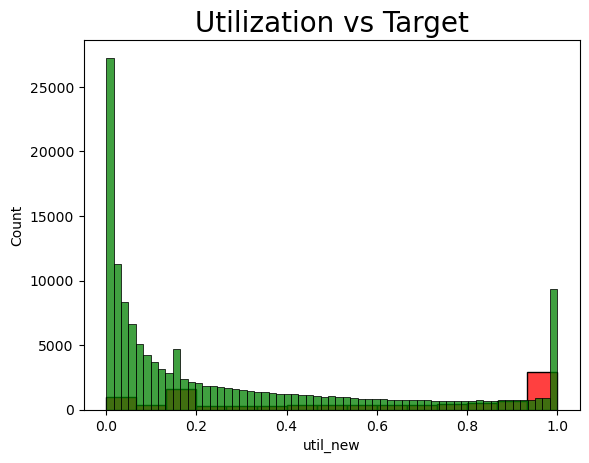

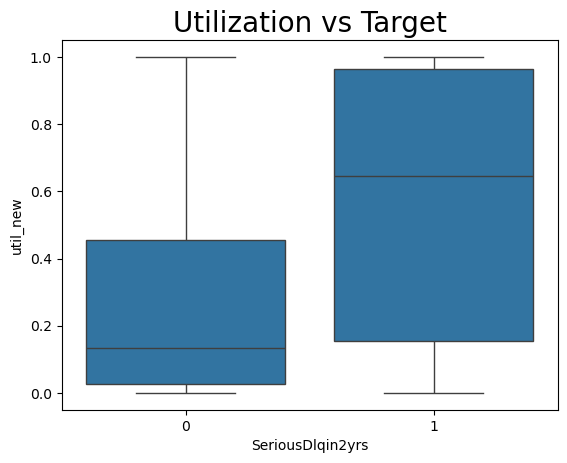

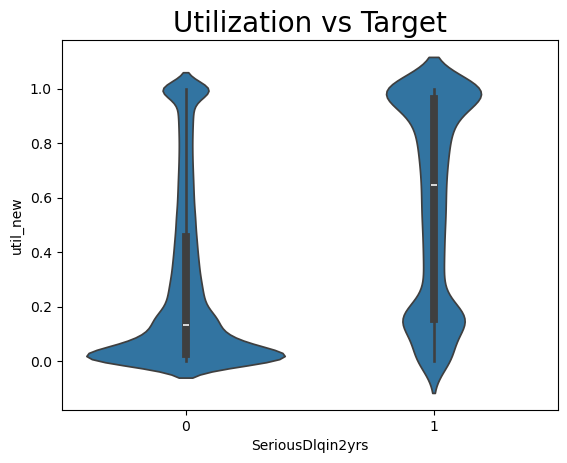

In [86]:
#Histogram Overlay
sns.histplot(credit_risk[credit_risk["SeriousDlqin2yrs"]==1]["util_new"], color="red")
sns.histplot(credit_risk[credit_risk["SeriousDlqin2yrs"]==0]["util_new"], color="green")
plt.title('Utilization vs Target', fontsize=20)
plt.show()

#Box Plots for Continuous and Categories comparison
sns.boxplot( x=credit_risk["SeriousDlqin2yrs"], y=credit_risk["util_new"])
plt.title('Utilization vs Target', fontsize=20)
plt.show()

#Violin plots for Continuous and Categories comparison
sns.violinplot(x=credit_risk["SeriousDlqin2yrs"], y=credit_risk["util_new"])
plt.title('Utilization vs Target', fontsize=20)
plt.show()



## WOE and Information Value

IV Function

In [87]:
def iv_woe(data, target, bins=10, show_woe=False):

    import numpy as np

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        #Binning
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Class0']

        # % of Class 0 and Class 1
        d['% of Class0'] = np.maximum(d['Class0'], 0.5) / d['Class0'].sum()
        d['Class1'] = d['N'] - d['Class0']
        d['% of Class1'] = np.maximum(d['Class1'], 0.5) / d['Class1'].sum()

        # WOE and IV
        d['WoE'] = np.log(d['% of Class0']/d['% of Class1'])
        d['IV'] = d['WoE'] * (d['% of Class0'] - d['% of Class1'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)

    #return newDF, woeDF
    print("===================\n")
    print(newDF.sort_values(by="IV", ascending=False))

### IV on Bank Market Data

In [88]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [89]:
bank_data["y"].value_counts()
bank_data["y_num"]=bank_data["y"].map({"no":0, "yes":1})
bank_data["y_num"].value_counts()

0    39922
1     5289
Name: y_num, dtype: int64

In [90]:
final_data=bank_data[["age","balance", "y_num"]]
iv_woe(data=final_data, target= "y_num")

Information value of age is 0.116017
Information value of balance is 0.101939

  Variable        IV
0      age  0.116017
0  balance  0.101939


### IV on Credit Risk Data

In [91]:
final_data=credit_risk.drop(["Sr_No"], axis=1)
iv_woe(data=final_data, target= "SeriousDlqin2yrs")

Information value of util_new is 0.926394
Information value of age_new is 0.254439
Information value of num_30_59_dpd_new is 0.471831
Information value of DebtRatio_new_ind is 0.000213
Information value of DebtRatio_new is 0.045139
Information value of MonthlyIncome_ind is 0.007741
Information value of MonthlyIncome_new is 0.067634
Information value of Open_Credit_lines_new is 0.065825
Information value of num_90_dpd_new is 0.0
Information value of Real_estate_loans_new is 0.045202
Information value of num_60_dpd_new is 0.0
Information value of NumberOfDependents_new is 0.031428

                 Variable        IV
0                util_new  0.926394
0       num_30_59_dpd_new  0.471831
0                 age_new  0.254439
0       MonthlyIncome_new  0.067634
0   Open_Credit_lines_new  0.065825
0   Real_estate_loans_new  0.045202
0           DebtRatio_new  0.045139
0  NumberOfDependents_new  0.031428
0       MonthlyIncome_ind  0.007741
0       DebtRatio_new_ind  0.000213
0          num_90

## Information Gain  (IG)

In [92]:
def IG_Cal(input_df, target_col):
  result_DF=pd.DataFrame()
  from sklearn import tree
  import matplotlib.pyplot as plt
  from sklearn.tree import plot_tree, export_text

  for col in input_df.drop(target_col, axis=1).columns.values:
    features= [col]
    X = input_df[features]
    y = input_df[target_col]
    DTree = tree.DecisionTreeClassifier(criterion="entropy" ,max_depth=1)
    DTree.fit(X,y)


    plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=True,
                     feature_names = features)
    plt.show()

    #Entropy and Information Gain
    entropy_array=DTree.tree_.impurity
    node_size=DTree.tree_.weighted_n_node_samples

    information_gain=entropy_array[0]-((node_size[1]/node_size[0])*entropy_array[1] + (node_size[2]/node_size[0])*entropy_array[2])
    print("Information_gain for the feature ", features, " is ", round(information_gain*100,3) , "%")

    temp =pd.DataFrame({"Variable" : [col], "IG" :[information_gain*100]}, columns = ["Variable", "IG"])
    result_DF=pd.concat([result_DF,temp], axis=0)

  print("===================\n")
  print(result_DF.sort_values(by="IG", ascending=False))

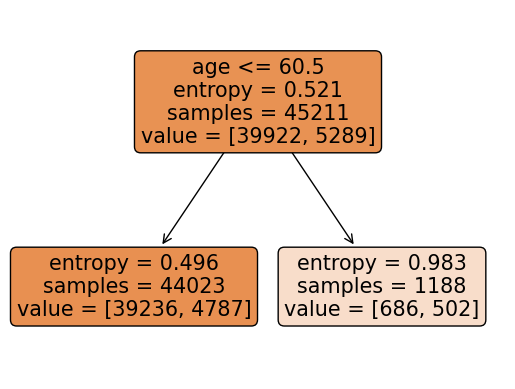

Information_gain for the feature  ['age']  is  1.175 %


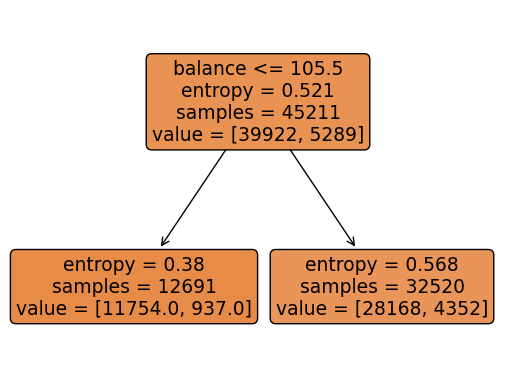

Information_gain for the feature  ['balance']  is  0.55 %

  Variable        IG
0      age  1.174739
0  balance  0.550369


In [93]:
final_data=bank_data[["age","balance", "y_num"]]
IG_Cal(final_data, "y_num")

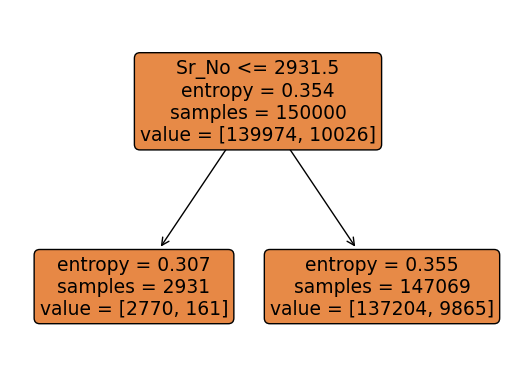

Information_gain for the feature  ['Sr_No']  is  0.003 %


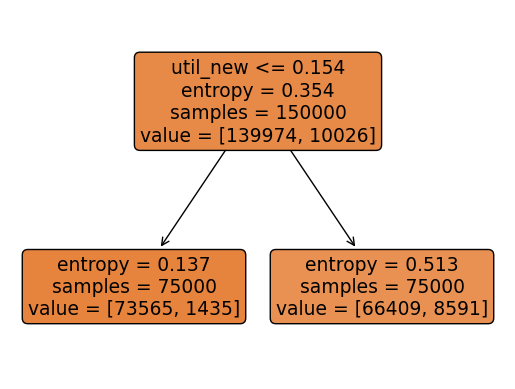

Information_gain for the feature  ['util_new']  is  2.901 %


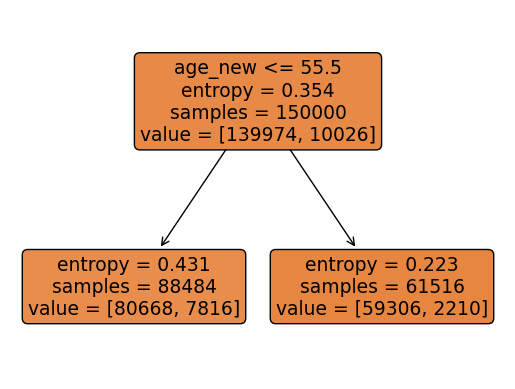

Information_gain for the feature  ['age_new']  is  0.827 %


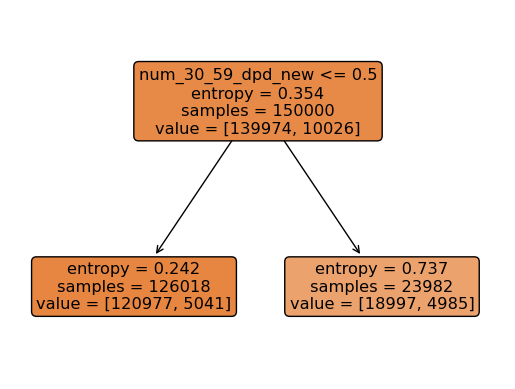

Information_gain for the feature  ['num_30_59_dpd_new']  is  3.256 %


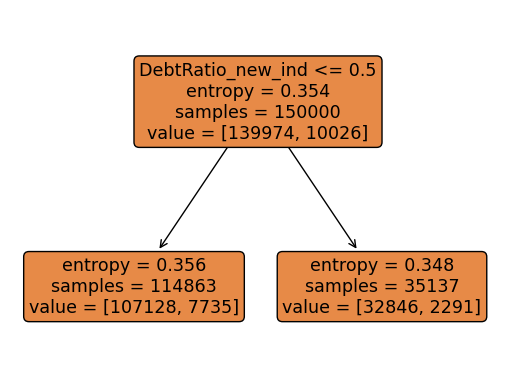

Information_gain for the feature  ['DebtRatio_new_ind']  is  0.001 %


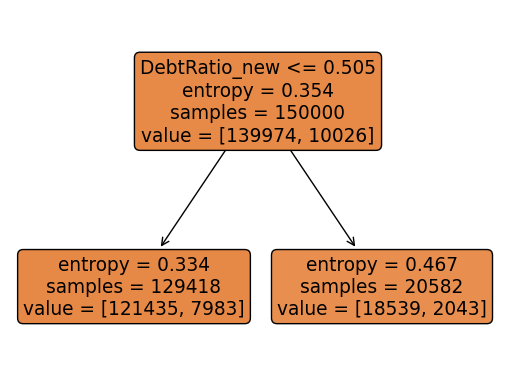

Information_gain for the feature  ['DebtRatio_new']  is  0.174 %


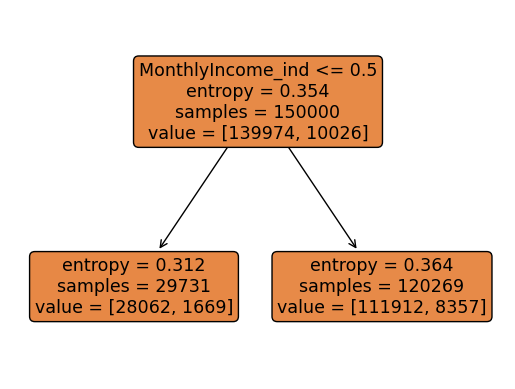

Information_gain for the feature  ['MonthlyIncome_ind']  is  0.034 %


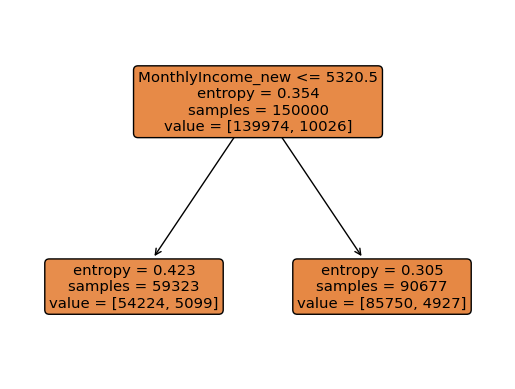

Information_gain for the feature  ['MonthlyIncome_new']  is  0.27 %


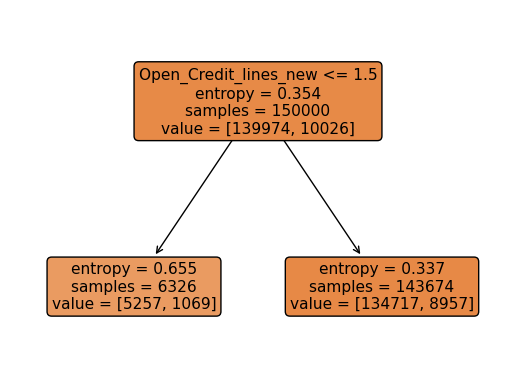

Information_gain for the feature  ['Open_Credit_lines_new']  is  0.39 %


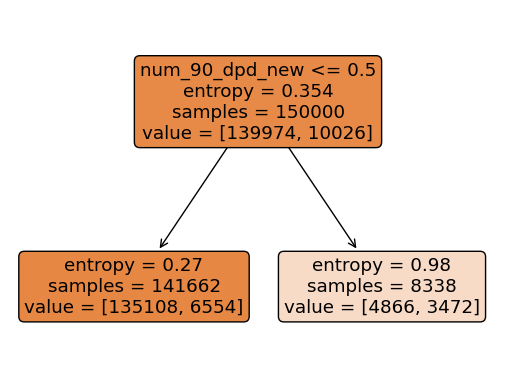

Information_gain for the feature  ['num_90_dpd_new']  is  4.427 %


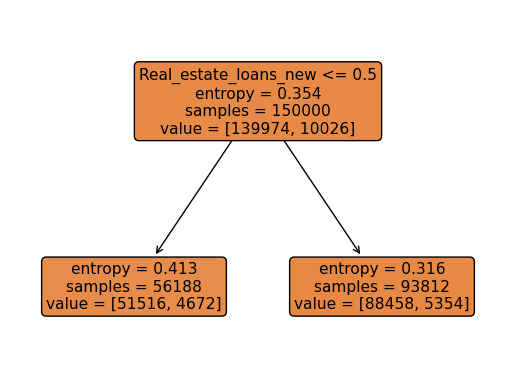

Information_gain for the feature  ['Real_estate_loans_new']  is  0.18 %


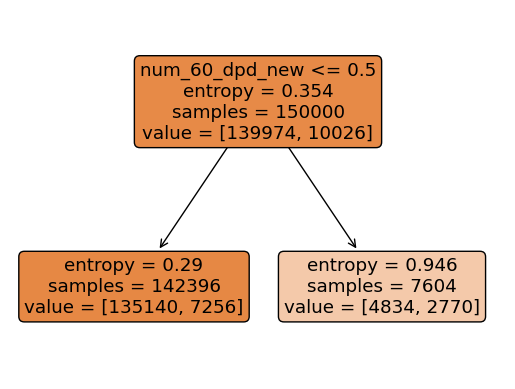

Information_gain for the feature  ['num_60_dpd_new']  is  3.033 %


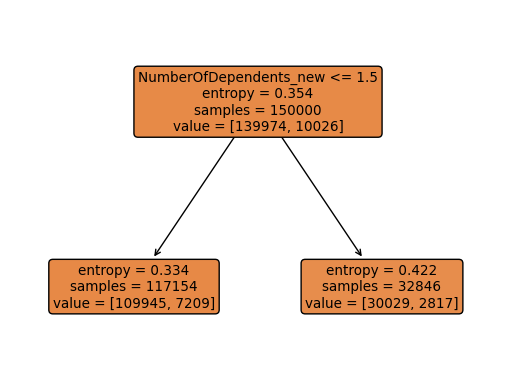

Information_gain for the feature  ['NumberOfDependents_new']  is  0.11 %

                 Variable        IG
0          num_90_dpd_new  4.427004
0       num_30_59_dpd_new  3.256348
0          num_60_dpd_new  3.033135
0                util_new  2.900594
0                 age_new  0.827420
0   Open_Credit_lines_new  0.390362
0       MonthlyIncome_new  0.270437
0   Real_estate_loans_new  0.179858
0           DebtRatio_new  0.173713
0  NumberOfDependents_new  0.109791
0       MonthlyIncome_ind  0.034092
0                   Sr_No  0.003464
0       DebtRatio_new_ind  0.000954


In [94]:
IG_Cal(credit_risk,'SeriousDlqin2yrs')

# Categorical(X) vs. Continuous (Y)

# Testing of Hypothesis

In [95]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

### Test for Single Mean

In [96]:
sales_sample=sales_data.sample(n=100,random_state=55)

ztest ,pval = stests.ztest(sales_sample["Customers"], x2=None, value=700)
print(ztest)
print("P-Value", float(pval))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

-2.6063279223993843
P-Value 0.009151879639808083
reject null hypothesis


### Test for Two Means

In [97]:
sales_sample=sales_data.sample(n=100,random_state=55)

ztest ,pval = stests.ztest(sales_sample["Sales"][sales_sample["Promo"]==0],
                           sales_sample["Sales"][sales_sample["Promo"]==1])
print(ztest)
print("P-Value", float(pval))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

-5.124020966949121
P-Value 2.9908770229173153e-07
reject null hypothesis


In [98]:
sales_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620,9,2009,0,0,0,0
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910,4,2015,0,0,0,0


In [99]:
#null hypothesis is that sales are same on school holiday and non school holiday
sales_sample=sales_data.sample(n=100,random_state=55)

ztest ,pval = stests.ztest(sales_sample["Sales"][sales_sample["SchoolHoliday"]==0],
                           sales_sample["Sales"][sales_sample["SchoolHoliday"]==1])
print(ztest)
print("P-Value", float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


-1.7659184807406827
P-Value 0.07740952622790348
accept null hypothesis


### Testing Multiple Means

In [100]:
sales_data["StoreType"].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

#### there is more then onecategory so we will use ANOVA test to check the significance , so will calculate f test score and p value
#### null hypothesis is that sales are same for all store types
#### alternate hypothesis is that sales are different for all store types
#### if p value is less then 0.05 then we will reject the null hypothesis
#### sales VS StoreType where StoreType is a,b,c,d

In [101]:



sales_sample=sales_data.sample(n=300,random_state=55)

F, p = stats.f_oneway(sales_sample["Sales"][sales_sample["StoreType"]=="a"],
                      sales_sample["Sales"][sales_sample["StoreType"]=="b"],
                      sales_sample["Sales"][sales_sample["StoreType"]=="c"],
                      sales_sample["Sales"][sales_sample["StoreType"]=="d"]
                      )
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


p-value for significance is:  0.571667784444414
accept null hypothesis


In [102]:
F, p = stats.f_oneway(sales_sample["Customers"][sales_sample["DayOfWeek"]==2],
                      sales_sample["Customers"][sales_sample["DayOfWeek"]==3],
                      sales_sample["Customers"][sales_sample["DayOfWeek"]==4])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.046746638498846124
reject null hypothesis


## IG For Continuous Target

In [103]:
def IG_Cal_Type2(input_df, target_col):
  result_DF=pd.DataFrame()
  from sklearn import tree
  import matplotlib.pyplot as plt
  from sklearn.tree import plot_tree, export_text

  for col in input_df.drop(target_col, axis=1).columns.values:
    features= [col]
    X = input_df[features]
    y = input_df[target_col]
    DTree = tree.DecisionTreeRegressor(criterion="mse" ,max_depth=1)
    DTree.fit(X,y)


    plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=True,
                     feature_names = features)
    plt.show()

    #MSE and Information Gain
    entropy_array=DTree.tree_.impurity
    node_size=DTree.tree_.weighted_n_node_samples

    information_gain=(entropy_array[0]-((node_size[1]/node_size[0])*entropy_array[1] + (node_size[2]/node_size[0])*entropy_array[2]))/entropy_array[0]
    print("Information_gain for the feature ", features, " is ", information_gain*100 )

    temp =pd.DataFrame({"Variable" : [col], "IG" :[information_gain*100]}, columns = ["Variable", "IG"])
    result_DF=pd.concat([result_DF,temp], axis=0)

  print("===================\n")
  print(result_DF.sort_values(by="IG", ascending=False))

Rossmann Store Sales Data

In [104]:
final_data=sales_data[["Promo",	"SchoolHoliday","DayOfWeek", "Sales"]]
IG_Cal_Type2(input_df=final_data, target_col="Sales")

InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'friedman_mse', 'absolute_error', 'squared_error', 'poisson'}. Got 'mse' instead.

# Categorical(X) vs Categorical(Y)

## Bar Chart for categorical variable comparison

<Axes: xlabel='count', ylabel='education'>

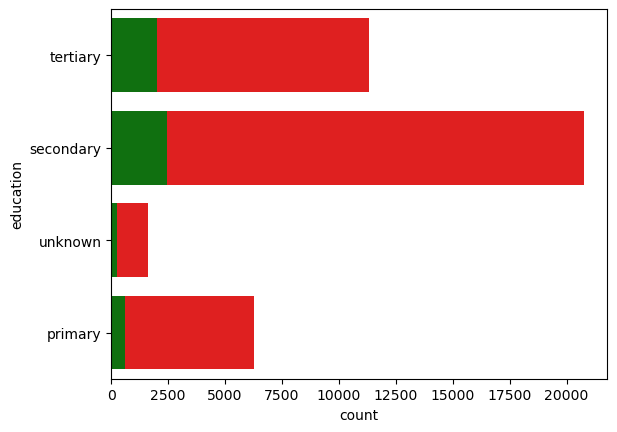

In [44]:
sns.countplot(y="education",  data=bank_data[bank_data["y"]=="no"], color="red")
sns.countplot(y="education",  data=bank_data[bank_data["y"]=="yes"], color="green")

In [45]:
plt.figure()
for col in categorical_cols:
  sns.countplot(y=col,  data=bank_data[bank_data["y"]=="no"], color="red")
  sns.countplot(y=col,  data=bank_data[bank_data["y"]=="yes"], color="green")
  plt.title([col + " Bar plot"])
  plt.show()


NameError: name 'categorical_cols' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()
for col in categorical_cols:
  sns.countplot(y=col,  data=bank_data,hue="y")
  plt.title([col + " Bar plot"])
  plt.show()

## Cross Tables

In [ ]:
for col in categorical_cols:
  print(pd.crosstab(bank_data[col], bank_data['y']))

In [ ]:
for col in categorical_cols:
  print(pd.crosstab(bank_data[col], bank_data['y'], margins=True))
  print("============================\n")

## Chi-Square Test of Independence

In [105]:
bank_data_sample=bank_data.sample(300)
import scipy.stats as stats

for col in categorical_cols:
  crosstab =pd.crosstab(bank_data_sample[col], bank_data_sample['y'])
  print(crosstab)
  Chi=stats.chi2_contingency(crosstab)
  p=Chi[1]
  print("p-value for significance is: ",p )
  if p<0.05:
    print("reject null hypothesis")
  else:
    print("accept null hypothesis")
  print("============================\n")

y              no  yes
job                   
admin.         20    4
blue-collar    59    4
entrepreneur    8    0
housemaid       9    1
management     54   12
retired        12    4
self-employed  13    0
services       29    2
student         5    0
technician     50    6
unemployed      6    1
unknown         1    0
p-value for significance is:  0.3218563613366157
accept null hypothesis

y          no  yes
marital           
divorced   32    3
married   157   22
single     77    9
p-value for significance is:  0.7813774593195768
accept null hypothesis

y           no  yes
education          
primary     40    7
secondary  131   12
tertiary    82   14
unknown     13    1
p-value for significance is:  0.3797498218400988
accept null hypothesis

y         no  yes
default          
no       258   34
yes        8    0
p-value for significance is:  0.6457093363623071
accept null hypothesis

y         no  yes
housing          
no       106   19
yes      160   15
p-value for significance is

## IG For Categorical Target

In [ ]:
bank_data["y_num"]=bank_data["y"].map({"no":0, "yes":1})
bank_data["housing_num"]=bank_data["housing"].map({"no":0, "yes":1})
bank_data["loan_num"]=bank_data["loan"].map({"no":0, "yes":1})

In [ ]:
final_data=bank_data[["loan_num","housing_num", "y_num"]]
IG_Cal(final_data, "y_num")

# Multivariate Effect Detection

In [ ]:
def Multi_level_Tree(input_df, target_col, levels):
  from sklearn import tree
  import matplotlib.pyplot as plt
  from sklearn.tree import plot_tree, export_text

  features= input_df.drop(target_col, axis=1).columns.values
  X = input_df[features]
  y = input_df[target_col]
  DTree = tree.DecisionTreeClassifier(criterion="entropy" ,max_depth=levels)
  DTree.fit(X,y)
  plt.figure(figsize=(15,7))
  plot_tree(DTree, filled=True,
                    rounded=True,
                    impurity=True,
                    feature_names = features)
  plt.show()
  print([[i, features[i]] for i in range(len(features))])
  print(export_text(DTree))

In [ ]:
Multi_level_Tree(input_df=credit_risk, target_col="SeriousDlqin2yrs", levels=2)

In [ ]:
Multi_level_Tree(input_df=credit_risk, target_col="SeriousDlqin2yrs", levels=3)

## Multivariate Interaction Effect for Regression

In [ ]:
def Multi_level_Tree_Reg(input_df, target_col, levels):
  from sklearn import tree
  import matplotlib.pyplot as plt
  from sklearn.tree import plot_tree, export_text

  features= input_df.drop(target_col, axis=1).columns.values
  X = input_df[features]
  y = input_df[target_col]
  DTree = tree.DecisionTreeRegressor(criterion="mse" ,max_depth=levels)
  DTree.fit(X,y)
  plt.figure(figsize=(15,7))
  plot_tree(DTree, filled=True,
                    rounded=True,
                    impurity=True,
                    feature_names = features)
  plt.show()
  print([[i, features[i]] for i in range(len(features))])
  print(export_text(DTree))

In [ ]:
sales_data.info()

In [ ]:
final_data=sales_data[["Promo",	"SchoolHoliday","DayOfWeek", "Sales","CompetitionDistance","Promo2"]]
Multi_level_Tree_Reg(input_df=final_data, target_col="Sales",levels=2)